<H1>Projet Zoidberg - Gwendal - Aanor - Yannick</H1>

<H2>Sommaire</H2>
    <ul>
        <li>1. Le projet et sa préparation<li/>
        <ul>2. Le choix du/des modèles
            <li>2.0 Les jeux de données</li>
            <li>2.1 La structure du modèle</li>
        </ul>
        <li>3. Les résultats<li/>
        <ul>4. Les axes de recherches supplémentaires
            <li>4.0 Prepocessing et 1ère approche</li>
            <li>4.1 Le 1er réseau de neurones<li/>
            <ul>4.2 Les autres pistes
                <li>4.2.0 La librairie OpenCV</li>
                <li>4.2.1 L'apprentissage par renforcement et les algorithmes génétiques</li>
            <ul/>
        <ul/>
     <ul/>

<h3>1. Le Projet et sa préparation</h3>

    Le projet Zoidberg est un projet d'intelligence artificielle. Celui-ci a pour but de réussir à déterminer si une image de radio de poumons présente une pneumonie en classifiant les images fournies.

    Ce projet reposant sur la reconnaissance d'images, nous avons choisi d'utiliser le langage python, avec les librairies Tensorflow et Keras. Ce langage est le plus simple d'approche pour un tel projet et est également bien fourni en outils de traitement et de reconnaissance d'images.

    Afin de réaliser ce projet, nous avons décidé de nous tourner vers un réseau de neurones convolutif, car il s'agit des modèles d'apprentissages basiques pour réaliser de la classification d'images.

    Nous reviendrons sur les choix de structures de nos modèles dans le prochain chapitre de cette documentation.

    Tensorflow et Keras sont des librairies conçues pour construire facilement des réseaux de neurones et qui permettent d'utiliser des modèles pré-entraînés, nous avons donc décidé de les utiliser pour ce projet. Nous savons qu'il existe aussi le modèle YoLo de la librairie openCV, cependant cette librairie est plus connue pour la détection d'objet dans une image : elle nous semblait donc moins adaptée à notre cas.

    Afin de nous préparer pour ce projet, nous avons d'abord travaillé sur un bootstrap dont le but était de mettre en place un "OCR", un algorithme de reconnaissance de caractères. Pour ce faire, nous avons choisi d'utiliser l'algorithme de machine learning "KNN" ("K-nearest neighbors") qui est l'algorithme le plus simple à comprendre en termes de principe, d'approche, et d'implémentation.

    Grâce à cette introduction, nous avons pu avoir une première approche de python pour ceux qui n'en avaient jamais fait. De plus, elle permet d'appréhender les débuts du machine learning pour préparer notre apprentissage du deep learning avec les réseaux de neurones.

<h3>2. Le choix du/des modèle(s)</h3>
    <h4>2.0 Les jeux de données</h4>
    
    Avant d'expliquer le choix de notre modèle, nous allons d'abord présenter quelques détails sur ces données fournies pour ce projet.
    Les données fournies se présentent sous la forme de 3 dossiers qui seront utilisés pour nos jeux de données.
    Ces 3 dossiers sont les sets d'entraînement, de validation et de test. Chacun de ces dossiers comprend 2 sous-dossiers qui portent le label associé aux images qu'ils contiennent.

    Ainsi, nous avons un sous-dossier "NORMAL" et un sous-dossier "PNEUMONIE".
    Nous avons choisi de charger ces images dans nos dataset a l'aide d'une fonction keras, car elle permet d'utiliser les données telles qu'elles sont fournies sans besoin de les modifier.
    De ce fait, il sera possible d'ajouter ou de supprimer des images de chacun des dossier sans que cela n'affecte le lancement du modèle. Cependant, si l'on retire trop d'images du set d'entraînement, cela entraînera naturellement une baisse de l'efficacité d'apprentissage du modèle.

    Nous redimensionnons également les images au moment de leur chargement dans le dataset afin qu'elles aient toutes la même taille, et pour diminuer le "bruit" : les informations inutiles présentent sur l'image qui pourraient perturber l'apprentissage du modèle.

    De plus, le set de validation étant très léger (20 photos au total réparties entre poumons normaux et pneumonie), nous avons décidé de mettre en place la "cross_validation" qui permet au modèle de sélectionner une fraction du set d'entraînement pour faire de la validation. Nous avons choisi d'allouer 30 % du dataset, car après plusieurs essaie avec différentes valeurs, c'est la proportion qui nous as offert les meilleurs résultats.

    Enfin, le dataset d'entraînement étant assez déséquilibré (4 000 images de pneumonie pour 1 000 images de poumons normaux environs), le modèle sera plus enclins à détecter des pneumonie et donc à produire des faux positifs.
    Nous avons donc pour résumer, charger chacun de ces dossiers dans un dataset séparé, que nous passons ensuite au modèle que nous avons choisi.

    Comme dit précédemment, nous avons choisi d'utiliser un réseau de neurones convolutionnel pour ce projet.
    Nous nous sommes orientés vers cette solution, car les réseaux de neurones présentent des résultats d'une bonne fiabilité sur leurs prédictions, à condition que les éléments à détecter soient précis. Ainsi, notre modèle, utilisé pour la prédiction de pneumonie, ne sera efficace que pour cet exercice, pas pour un autre type de prédiction.

    Avant de décrire notre modèle, nous allons définir ce qu'est un réseau de neurones convolutionnel :
    Un réseau de neurones convolutionnel est un type de réseau de neurones utilisé en deep learning pour la reconnaissance de caractéristiques sur images
    Pour ce faire, ces réseaux sont construits en plusieurs couches de convolutions. Nous expliquerons le fonctionnement de la convolution lorsque nous détaillerons la structure de notre modèle.

    Suite à la convolution, le réseau passe par une couche de réduction de la taille des données pour ne retenir que les informations pertinentes pour la détection des patterns liés à ce que l'on souhaite détecter.
    Enfin, en sortie du modèle, nous avons des couches dites "Denses" qui sont entièrement connectées à chaque neurone de la couche précédente.
    Ces couches "Denses" convergent ensuite vers une dernière couche dont la taille correspond au nombre de classes possibles en sortie du modèle, dans notre cas, il y a 2 neurones en sortie : un neurone pour prédire une radiographie "normale" et un neurone pour prédire une radiographie présentant une pneumonie.

<h4>2.1 La structure du modèle</h4>
    Dans cette partie, nous allons détailler comment nous avons construit notre modèle.
    Pour commencer, notre modèle compte un total de 20 couches réparties comme suit : 
        <ul>- 4 couches de convolution</ul>
        <ul>- 4 couches de pooling</ul>
        <ul>- 5 couches de dropout</ul>
        <ul>- 1 couche de Flatten</ul>
        <ul>- 1 couche Dense de 128 neurones</ul>
        <ul>- 1 couche Dense de 2 neurones</ul>
    
    Avant de détailler chaque couche, nous allons définir le cœur du fonctionnement de notre type de modèle de réseau : la convolution

    La convolution est le fait de déplacer une matrice de petite taille (souvent de 2x2 ou 3x3) sur notre image.
    Ensuite, la couche de neurones applique un produit scalaire sur les valeurs de pixels présentes dans ces matrices afin de détecter les différents patterns présents dans sa zone géographique. Un "pattern" fait référence à un contour ou une bordure présent dans la matrice. Dans notre exemple, il peut s'agir de trouver les bordures qui délimitent l'emplacement de l'infection.

    Le produit scalaire se définit comme suit :
    Le produit scalaire est le fait de multiplier 2 vecteurs puis d'additionner ces produits.
    Par exemple pour deux vecteurs V, et W un produit scalaire se traduit de la façon suivante :
    V * W = V1 * W1 + V2 * W2 + ... + Vn * Wn
    Ecrit sous une autre forme, la formule du produit scalaire se présente ainsi :
    V * W = ΣVi * Wi pour i allant de 1 à n

    De ce fait, une convolution est générée pour chaque neurone de la couche de convolution.
    De plus, chaque couche de convolution du modèle utilise une fonction d'activation afin de déterminer si un neurone donné de la couche transmet ses informations à la couche suivante ou pas.

    Dans notre cas, nous avons choisi la fonction d'activation "sigmoid", car elle nous retourne un résultat sous forme d'une distribution de probabilités compris entre 0 et 1, avec 1 étant une prédiction certaine faite par le neurone.

    La fonction sigmoid prend en entrée un nombre, et nous fournis le résultat selon le fonctionnement suivant : plus le nombre passé en entrée est négatif, plus le résultat de la fonction sera proche de 0 indiquant que la probabilité que l'élément fourni appartient à la classe que l'on veut prédire est faible.

    À l'inverse, plus le nombre passé en entrée est positif, plus le résultat sera proche de 1, indiquant qu'il y a de grandes chances pour que l'élément appartienne à la classe.
    Enfin, comme la fonction sigmoid retourne toujours un résultat compris entre 0 et 1, elle semble parfaitement indiquée pour un problème de classification binaire.

    Nous avons également essayé d'utiliser la fonction d'activation "relu", car elle permet de rendre les résultats "non-linéaires" et donc éviter que le modèle n'apprenne les données "par coeur". Cependant, cette fonction est moins adaptée à notre situation qu'une fonction "sigmoid" qui est la plus indiquée dans les cas de classification binaire.

    Pour ce qui est de la "structure neuronale" du réseau, nous avons choisi de la construire en 2 parties :

    La première partie sert à la reconnaissance et l'apprentissage de pattern.


    La seconde partie sert à la propagation de cet apprentissage dans le reste du modèle pour la prise de décision


    La structure suit le schéma ci-dessous :

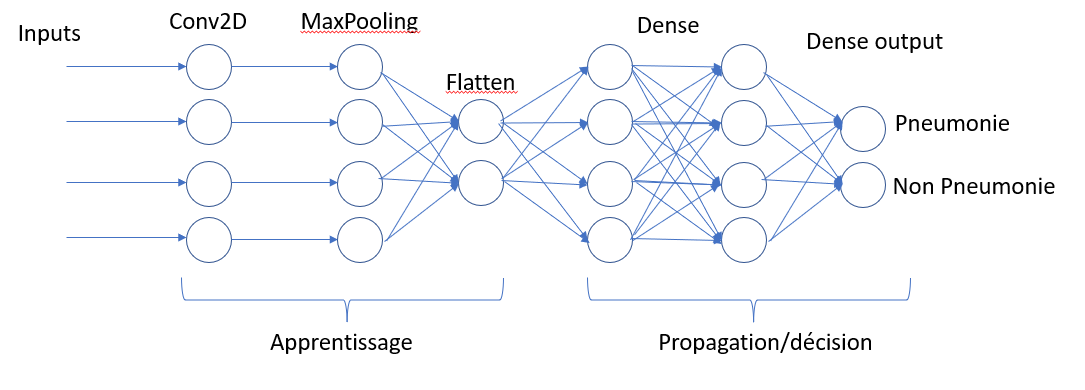

Nb. Ce schéma n'est qu'une vision globale du fonctionnement du réseau, il ne présente pas en détail la totalité des couches présentes dans celui-ci

    Nous avons choisi cette structure, car elle semble la plus optimale pour l'apprentissage et la généralisation des patterns.

    Nous avons également essayé un réseau avec des couches de même taille à chaque fois, cependant, nous nous sommes aperçus qu'à partir d'un moment, le modèle ne parvenait plus à apprendre.
    De plus, l'écart entre les données sorties durant l'entraînement, et les prédictions étaient beaucoup trop éloignées.

    À la suite des couches de convolutions et pooling, nous avons ajouté une couche "Dropout" qui désactive aléatoirement un nombre de neurones donné.

    De cette façon, nous pouvons empêcher le modèle de tenter d'apprendre "par cœur" les résultats en sortie des couches et donc de mieux généraliser la reconnaissance des patterns, et donc avoir une meilleure robustesse sur ses futures prédictions.

    Enfin, pour conclure la partie d'apprentissage du modèle, nous avons ajouté une couche "Flatten".

    Cette couche est obligatoire dans le modèle, car c'est elle qui rend compatibles les 2 parties du réseau.
    En effet, la 1ère partie prend en entrée et manipule des matrice multidimensionnelles pour l'apprentissage, la 2ème partie à l'inverse, utilise des matrice à une dimension pour le traitement et la prise de décision. Nous avons donc une incompatibilité au vu des différences de dimensions des matrices d'entrée des différentes couches.
    
    Heureusement, la couche Flatten est justement faite pour notre cas, elle prend en entrée des matrices multidimensionnelles pour les "aplatir" en matrice à une dimension.
    Pour vulgariser, il s'agit de l'équivalent d'un "reshape" avec la librairie numpy ou l'on multiplie les 2 dimensions que l'on souhaite aplatir pour obtenir une matrice avec un nombre de dimension inférieur.

    Suite à la mise en compatibilité des 2 parties du réseau grâce à la couche Flatten, nous avons ensuite 2 couches Dense.
    Une de ces 2 couches possède 128 neurones, qui permettent de transformer les matrices passées en entrée en une représentation de la prédiction du réseau.
    
    Pour ce faire, elle calcule une somme pondérée des entrées avec la matrice de poids d'entrée de chacun des neurones. Cette matrice de poids est calculée et apprise durant l'entraînement du réseau.
   
    Elle ajoute ensuite un biais puis passe le tout à une fonction d'activation pour produire le résultat. Une fois encore, comme nous souhaitons effectuer une classification binaire en sortie, nous avons choisi d'utiliser la fonction d'activation sigmoid.

    La dernière couche du réseau est une couche Dense de 2 neurones, un neurone par classe possible en sortie du réseau.
    Nous avons choisi la fonction d'activation "softmax" pour cette couche.
    
    La fonction d'activation softmax fonctionne globalement comme la fonction sigmoid, à la différence qu'elle applique une normalisation du résultat en sortie, c'est-à-dire qu'elle vérifie la loi de distribution de probabilité. Ainsi, la probabilité la plus haute fournit par la fonction est passée à la valeur 1, quant à la probabilité la plus faible, elle est passée à la valeur 0.

<h3>3. Les résultat</h3>
    
    Cette courte partie nous permet de présenter rapidement les résultats fournis par notre modèle ainsi que quelques graphiques montrant l'évolution de son apprentissage et les différences de prédiction lors de l'entraînement et des tests.

    Afin de rendre l'affichage des résultats plus parlant, nous allons les comparer avec les résultats d'un autre réseau de neurones que nous avons fait puis enregistrer, mais qui possède des paramètres différents.

    Nous allons commencer par comparer la précision annoncée de ces algorithmes lors de la phase d'entraînement :

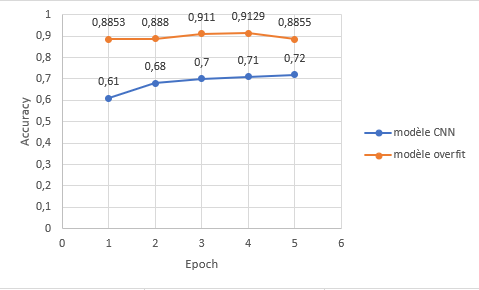

    À première vue, il semblerait que le modèle en overfitting apprenne mieux que le modèle que nous avons conservé.

    En effet, celui-ci présente une précision comprise entre 88 et 91 % ce qui semble prometteur, à l'inverse de notre modèle qui présente une précision d'une part plus diffuse, mais également plus faible.

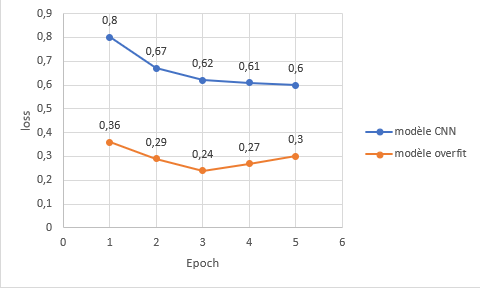

    Cependant, nous pouvons voir sur ce graph que le modèle overfit montre des difficulté à minimiser sa perte de donnée sur les dernières epochs.

    De plus, celui-ci montre dès le début une loss assez faible, ce qui indique que dès la 1re epoch, il pourrait avoir essayé de trop apprendre "par cœur" les patterns de ses images.

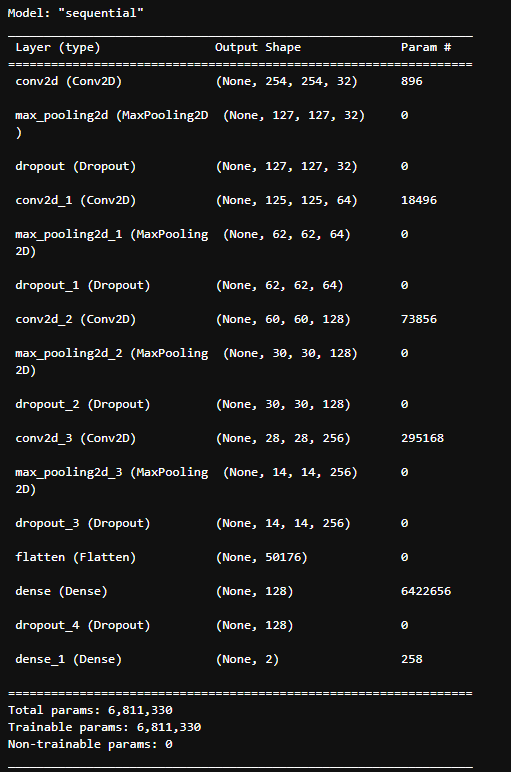 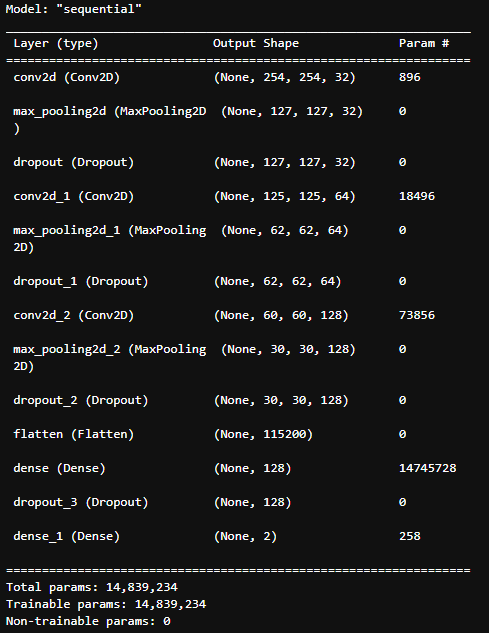

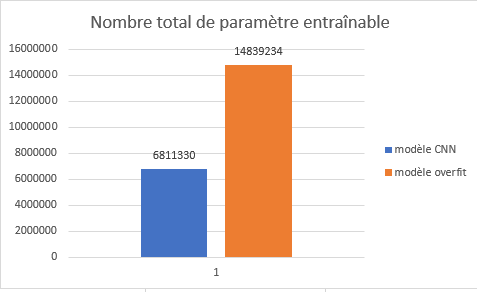

Nb. Le modèle que nous avons conservé est représenter par le tableau de gauche, tandis que celui en overfitting est représenté par le tableau de droite.
    
    Pour expliquer ce comportement, nous pouvons nous intéresser aux nombres de paramètres entraînables des modèles.
    Nous pouvons observer que le modèle overfit possèdent plus du double de paramètre de notre modèle actuel, de ce fait, il effectue plus de travail pour apprendre les patterns.
    Cette différence dans le nombre de paramètres peut induire le fait que le modèle overfit est moins capable de généraliser ses résultats que notre modèle actuel.

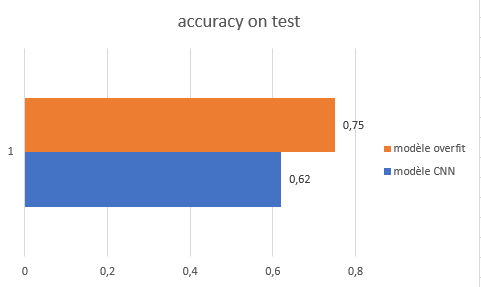

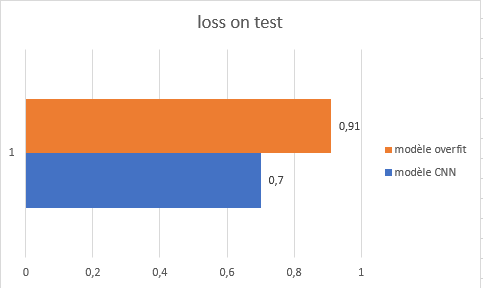

    Enfin, pour conclure cette partie, nous pouvons comparer les métriques fournies par l'évaluation de nos deux modèles :
    
    Le modèle overfit annonce une meilleure précision, mais également plus de perte que notre modèle actuel.
    
    Cependant, il ne faut pas oublier que ce premier modèle annonçait une précision de 91 % maximale, de ce fait, l'entropie entre l'annonce de précision à l'entraînement et le résultat à l'évaluation est trop grande pour que les résultats soient fiables.
    À l'inverse, notre modèle actuel tend à réduire cette même entropie avec un écart de 10 % environ.

    En l'état, notre modèle ne reste cependant pas suffisamment fiable pour que l'on puisse se baser sur ses prédictions, et ce, malgré cette tendance à réduire sa probabilité d'erreur.
    
    Comme expliqué plus haut dans ce document, cela peut s'expliquer par le déséquilibre dans les données d'entraînement, illustrer par la matrice de confusion ci-dessous.

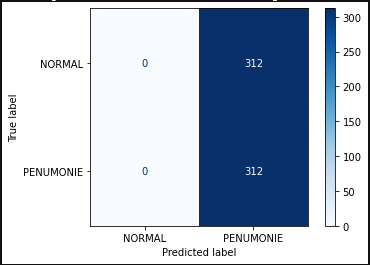

    Comme nous pouvons le voir, notre modèle a bien annoncé les pneumonies comme voulues, cependant, il n'a pas été capable de voir ce qu'était un poumon ne présentant pas de pneumonie.

    Pour tenter de remédier à cela, nous pourrions essayer de réduire encore la taille des images jusqu'à atteindre un compromis optimal entre réduction du bruit et risque de perte de donnée importante.

    Une autre piste pourrait être d'avoir un nombre équivalent de radio de poumons normaux et de poumons atteints de pneumonie pour rééquilibrer le jeu de données.

<h3>4. Les axes de recherches supplémentaires</h3>
<h4>4.0. Preprocessing et 1ère approche<h4/>

    En parallèle de tout cela, nous avons également essayé tenté d'autre piste au sujet du preprocessing et de l'algorithme qui sert à la prédiction des pneumonies.
    
    Au début du projet, nous avons pensé à une première approche avec un algorithme de machine learning supervisé, seulement celui-ci utilise une librairie différente de celle que nous avons finalement choisi.
    Avec cette librairie, nous devions charger les données sous forme de CSV, cependant les données étant séparer en 2 dossiers, cela rendait la tâche plus complexe pour générer nos jeux de donnée.

    Pour remédier à cela, nous avons pensé à fusionner les dossiers avec un script python puis à charger les images depuis un unique dossier pour les transformer en tableau numpy.
    Cependant, nous avions besoin de labelliser les images pour pouvoir utiliser l'algorithme, mais toutes les images n'avaient pas la même convention de nommage.
    La fusion était fonctionnelle, cependant le renommage automatique des images à poser plusieurs soucis du fait du manque d'homogénéité des noms.

    Cela nous a amené à devoir prendre en compte plusieurs cas spécifiques et donc à rendre le script non générique, empêchant le respect d'une des règles du projet : pouvoir supprimer ou ajouter des images sans que cela ne perturbe le fonctionnement de l'apprentissage.

    Lors de nos recherches nous avons donc découvert la fonction "load_dataset_from_directory" de keras qui permettais de charger nos jeux de données pré-labellisés depuis la structure d'origine des jeux de données.
    Nous avons donc continué sur cette piste et laisser de côté l'algorithme supervisé pour le projet. Cependant, même si nous ne l'avons pas implémenté pour le projet, nous l'avons tout de même étudié pour le bootstrap de ce projet, afin de comprendre son fonctionnement.

    Nous avons donc étudié un algorithme de machine learning supervisé, le KNN pour K-nearest neighbors dans le cadre du bootstrap.
    Le principe de cet algorithme est de rassembler les éléments d'une même classe en fonction des éléments qui lui ressemble le plus.

    Par exemple, si pour un point donné nous cherchons ses 5 plus proches voisins, et que parmi ces 5 voisins, 3 fonts partis de la classe "triangle" alors l'algorithme déterminera qu'il y a de fortes chances pour que le point que l'on souhaite catégoriser fasse partie de la classe des triangles.

    Cet algorithme repose sur le calcul de la distance euclidienne pour déterminer les plus proches voisins. Même si en théorie un tel algorithme pourrais être utilisable dans notre cas puisqu'il s'agit de faire de la classification, la quantité de données à calculer pour déterminer les plus proches voisins serais beaucoup trop conséquente pour que cela soit intéressant. Cependant, l'utilisation de cet algorithme dans la reconnaissance de caractère du jeu de données "MNIST" nous a été utile comme 1re approche du domaine du machine learning, car il s'agit d'un algorithme simple et facilement faisable à la main. Nous joignons une version de KNN à ce document.

<h4>4.1. Le 1er réseau de neurones<h4/>    

    Après avoir trouvé la méthode pour charger nos jeux de données, nous nous sommes orienté vers un réseau de neurones convolutionel. Ce type d'algorithme fonctionne très bien dans le cas des classifications d'images, mais doit être cependant spécialisé. Ainsi, un réseau entraîné à reconnaître des pneumonie ne sera efficace que pour ce type de reconnaissance, il ne sera pas capable de reconnaître une tumeur cancéreuse par exemple.

    Cela vient du fait que le réseau soit entraîné à reconnaître des "pattern" spécifique, ou des motifs qui se répètent entre les images et qui permet de savoir si une des radio présente une pneumonie ou non. Les motifs étant spécifiques à chaque élément que l'on souhaite détecter, il est naturel qu'il soit nécessaire de spécialiser l'algorithme.

    Lors de nos 1ers, essaie, nous étions partis du principe de créer un réseau de neurones "full connected", c'est-à-dire avec des couches denses après chaque convolution en tant "qu'hidden layers", dont nous avons déjà expliqué le fonctionnement plus haut dans ce document.

    Notre idée de départ était que plus le réseau aurait d'élément d'apprentissage, plus il serait performant et précis. Cependant, même si les algorithmes de réseaux de neurones sont décrits comme essayant de "mimer" le fonctionnement des neurones humain, cela reste un programme.
    Fournir beaucoup de données à une personne lui permet d'apprendre beaucoup, mais le comportement humain fait que l'on est capable de faire un tri dans les informations que l'on reçoit. Le réseau de neurones ne faisant pas de tri, il s'est avéré que conserver toutes les données que nous avions en entrée du réseau l'empêchait d'apprendre correctement.

    En effet, étant donné que nous conservons toutes les données couches après couches, le modèle prend un temps considérable à apprendre dans un 1er temps (plus de 8h pour nos 1ers algorithmes), mais de plus, il devient incapable de généraliser les résultats qu'il fournit.
    Les données étant fournies de la même façon, il finit par apprendre par cœur à cause de la linéarité des données.

    De plus, les couches denses prenant en entrée des matrices unidimensionnelles, cela ajoutait une couche de processing des données supplémentaire à chaque fois.

    De ce constat, nous avons eu l'idée d'ajouter un élément d'aléatoire dans le réseau : la couche dropout dont nous avons parlé.

    Ensuite, nous devions changer la structure du réseau afin de le rendre plus efficace.
    Après discussion avec notre intervenant, il est apparu que la séparation de la partie apprentissage et de la partie reconnaissance semblais être la meilleure façon de procéder.
    De cette façon, nous avons nos couches de convolutions successives qui produisent des pattern, puis nos couches dense qui permettent de les utiliser pour reconnaître une pneumonie.

    Ainsi, en combinant la nouvelle structure et l'aléatoire induit par les couches dropout, nous avons pu gagner en efficacité et en généricité de l'apprentissage.

<h4>4.2 Les autres pistes<h4/>
Dans cette partie, nous évoquerons les autres pistes que nous avions envisagé mais que nous avons moins exploré, soit par manque de temps, soit par manque de compréhension de ces méthodes et du temps d'apprentissage pour les prendre en mains, ou parce qu'elle ne correspondait pas à notre besoin

<h5>4.2.0 La librairie openCV<h5/>

    La 1re de ces pistes est l'utilisation de la librairie python "openCV" très connu pour son utilisation dans le traitement d'images ou de vidéos et les fonctions mathématiques qu'elle offre.
    
    Nous nous étions notamment intéressés à l'algorithme "YoLo" qui se base sur l'utilisation des réseaux de neurones pour reconnaître des objets dans l'image.
    Cependant, cette librairie est principalement utilisée pour reconnaître des objets visibles et notamment des formes géométriques telles que des rectangles des cercles.
    Après, par associations des différents éléments, il est possible de reconnaître des éléments plus complexes, cependant, étant donné que nous ne sommes pas en mesure de faire la différence entre un poumon normal et un poumon atteint de pneumonie, nous n'étions pas en mesure de savoir ce que l'algorithme allais devoir reconnaître. 

<h5>4.2.1 L'apprentissage par renforcement et les algorithmes génétiques<h5/>

    Nous nous sommes également intéressés à l'apprentissage par renforcement, qui est une catégorie d'apprentissage en marge des apprentissages supervisés et non supervisés.
    Le 1er fourni en entrée les données et labels attendu et l'algorithme doit être capable de prédire correctement le label d'un élément en se basant sur les données avec lequels il s'est entraîner.
    L'apprentissage non supervisé fonctionne sur le principe de "clustering" : l'algorithme va essayer de faire des regroupement des données selon plusieurs hyperparamètres puis assigner un label à ces données.

    L'apprentissage par renforcement fonctionne différemment :
    Dans ce type d'apprentissage, nous avons tout d'abord un agent (l'algorithme), et un environnement qui est mis en place pour cet agent.
    Lors de l'apprentissage, nous cherchons à reproduire et à exploiter le système de récompense du cerveau humain. Pour cela, nous allons faire passer notre agent par une série de tests et procéder comme suit :
    Si notre agent fournit la bonne réponse, il reçoit une récompense.
    Si notre agent fournit une mauvaise réponse, il reçoit une punition.

    Le but de l'agent va alors être de maximiser l'obtention des récompenses en ajustant ses réponses en fonctions des résultats des réponses précédentes.
    La récompense est représentée par une valeur indiquant à l'agent qu'il se rapproche de la solution. À l'inverse, la punition est une valeur indiquant qu'il s'en éloigne.

    Ce type d'apprentissage peut-être mis en parallèle des algorithmes génétique pour vulgariser son fonctionnement.
    Dans ce type d'algorithme, nous créons une population d'individus appelés "gènes" avec des paramètres définis, puis effectuons des tests avec ces populations sur plusieurs itérations que l'on appelle le plus souvent "génération".

    À la fin d'une génération, nous conservons un nombre défini d'individu ayant eu les meilleurs résultats durant cette génération.
    Ensuite, nous fusionnons leurs gènes puis les intégrons à la génération suivante et ainsi de suite jusqu'à obtenir le résultat attendu.
    Afin d'éviter une convergence des gènes, nous introduisons également une notion d'aléatoire appelées "mutation", c'est-à-dire que nous modifions aléatoirements certain paramètres d'un ou plusieurs individu.

    Au début des tests, ces deux types d'algorithme, ceux qui fonctionnent avec l'apprentissage par renforcement et les algorithmes génétiques, vont faire des actions totalement aléatoires, puis à force d'itération, ils conserveront les meilleurs résultats obtenus et affineront leurs tests pour tendre vers la solution.